<a href="https://colab.research.google.com/github/pawanraje16/CVDLlab/blob/main/mango_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [3]:
# Load the model without the top (fully connected) layers
base_model =  ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

I0000 00:00:1749841456.553112      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
base_model.trainable = False

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Flatten the output of the convolutional base
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
x = Dense(6, activation='softmax')(x)  # 6-class classification

# Create the new model
model = Model(inputs=base_model.input, outputs=x)

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)


In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 49,279,622 (187.99 MB)

 Trainable params: 25,691,910 (98.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [8]:
print(f"Total layers in Resnet50: {len(model.layers)}")

Total layers in Resnet50: 179


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator (for rescaling)
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/rgan224x224/REALGANAUGMENTED224x224/train',   # Path to train folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Multi-class classification (8 classes)
)

# Load Validation Data
val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/rgan224x224/REALGANAUGMENTED224x224/val',   # Path to validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Test Data (For final evaluation)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/rgan224x224/REALGANAUGMENTED224x224/test',   # Path to test folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False   # No shuffling for test set
)

Found 46646 images belonging to 6 classes.
Found 9993 images belonging to 6 classes.
Found 10001 images belonging to 6 classes.


In [11]:
#Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30
)

# =====================
# 💾 Save Model in All Formats
# =====================
os.makedirs('/kaggle/working/saved_models', exist_ok=True)

# 1. Full model (HDF5)
model.save('/kaggle/working/saved_models/RGANMango_ResNet50.h5')

# 2. Weights only
model.save_weights('/kaggle/working/saved_models/RGANMango_ResNet50_weights.h5')

shutil.make_archive('/kaggle/working/mango_models_ResNet50', 'zip', '/kaggle/working/saved_models')
print("\n✅ All models saved and zipped at /kaggle/working/mango_models_ResNet50.zip")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1749841886.480372      96 service.cc:148] XLA service 0x7c21b40031e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749841886.481310      96 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749841887.973935      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/1458 ━━━━━━━━━━━━━━━━━━━━ 1:18 54ms/step - accuracy: 0.2656 - loss: 9.6664  

I0000 00:00:1749841892.132361      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1458/1458 ━━━━━━━━━━━━━━━━━━━━ 355s 233ms/step - accuracy: 0.8770 - loss: 1.8482 - val_accuracy: 0.9706 - val_loss: 0.1188
Epoch 2/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 184s 126ms/step - accuracy: 0.9426 - loss: 0.2350 - val_accuracy: 0.9789 - val_loss: 0.0881
Epoch 3/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 182s 125ms/step - accuracy: 0.9475 - loss: 0.1966 - val_accuracy: 0.9854 - val_loss: 0.0605
Epoch 4/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 190s 131ms/step - accuracy: 0.9580 - loss: 0.1569 - val_accuracy: 0.9777 - val_loss: 0.0737
Epoch 5/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 185s 127ms/step - accuracy: 0.9572 - loss: 0.1551 - val_accuracy: 0.9778 - val_loss: 0.0825
Epoch 6/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 181s 124ms/step - accuracy: 0.9630 - loss: 0.1443 - val_accuracy: 0.9868 - val_loss: 0.0472
Epoch 7/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 183s 125ms/step - accuracy: 0.9659 - loss: 0.1225 - val_accuracy: 0.9820 - val_loss: 0.0779
Epoch 8/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 183s 125ms/step - accuracy: 0.9

NameError: name 'os' is not defined

In [16]:
import os
import shutil
# =====================
# 💾 Save Model in All Formats
# =====================
os.makedirs('/kaggle/working/saved_models', exist_ok=True)

# 1. Full model (HDF5)
model.save('/kaggle/working/saved_models/RGANMango_ResNet50.h5')

# 2. Weights only
model.save_weights('/kaggle/working/saved_models/RGANMango_ResNet50.weights.h5')

shutil.make_archive('/kaggle/working/mango_models_ResNet50', 'zip', '/kaggle/working/saved_models')
print("\n✅ All models saved and zipped at /kaggle/working/mango_models_ResNet50.zip")


✅ All models saved and zipped at /kaggle/working/mango_models_ResNet50.zip


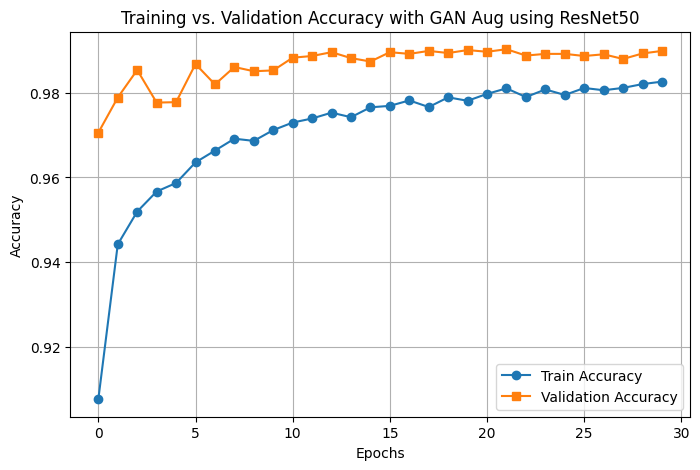

In [14]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy with GAN Aug using ResNet50')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 272ms/step - accuracy: 0.9838 - loss: 0.1436
Test accuracy: 0.9879


313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 125ms/step

Classification Report with GAN Aug using ResNet50:
                    precision    recall  f1-score   support

       ANTHRACNOSE       0.99      0.99      0.99      1634
           DIEBACK       1.00      1.00      1.00      1664
  GALLMILDGEDAMAGE       1.00      0.98      0.99      1596
           HEALTHY       0.99      1.00      0.99      1793
INSECTDAMAGEWEBBER       0.96      0.98      0.97      1671
        LEAFBLIGHT       0.99      0.99      0.99      1643

          accuracy                           0.99     10001
         macro avg       0.99      0.99      0.99     10001
      weighted avg       0.99      0.99      0.99     10001



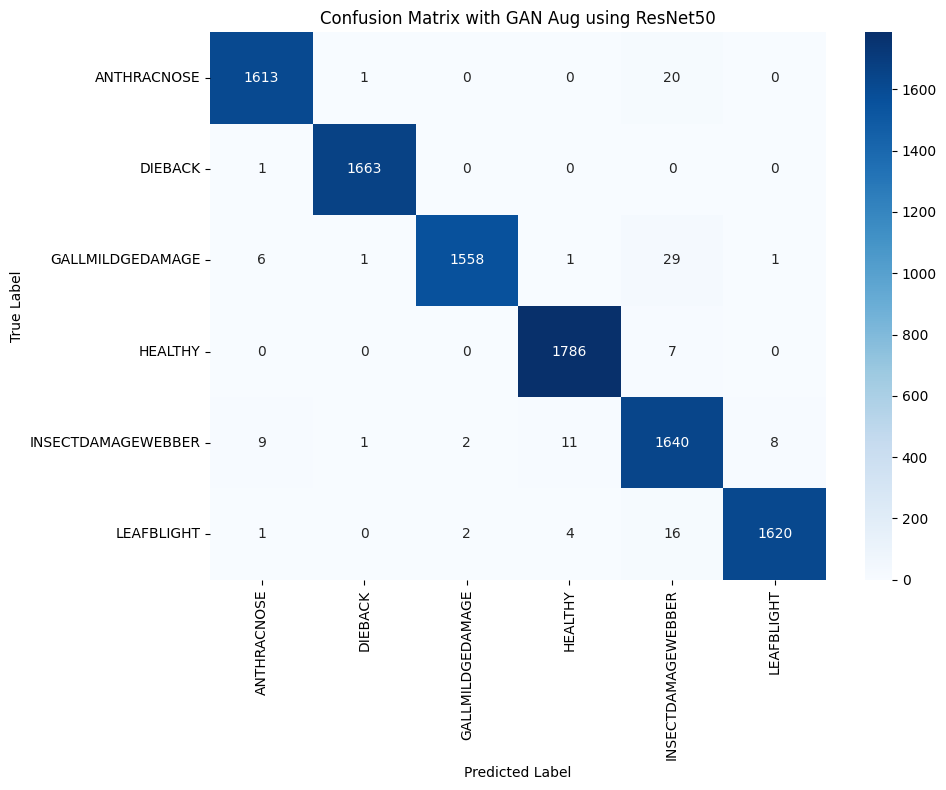

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Predict on test data
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Classification Report
class_names = list(test_generator.class_indices.keys())
print("\nClassification Report with GAN Aug using ResNet50:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix with GAN Aug using ResNet50")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [24]:
# =====================================
# 📷 Grad-CAM on 5 Real Sample Images
# =====================================
from tensorflow.keras.preprocessing import image
import glob

# 🔧 Directory containing real images
sample_class = 'ANTHRACNOSE'  # 🔁 change class name if needed
sample_folder = f'/kaggle/input/rgan224x224/REALGANAUGMENTED224x224/test/{sample_class}'
image_paths = sorted(glob.glob(os.path.join(sample_folder, '*.*')))
image_paths = [p for p in image_paths if p.lower().endswith(('.jpg', '.jpeg', '.png'))][:5]
 # first 5 images

print(f"\n📸 Displaying Grad-CAM for 5 images from class: {sample_class}\n")

for idx, img_path in enumerate(image_paths):
    # Load and preprocess
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    preds = model.predict(img_array)
    pred_class = np.argmax(preds[0])
    pred_label = class_labels[pred_class]

    # Grad-CAM
    heatmap = make_gradcam_heatmap(img_array, model, 'block5_conv3')
    img_display = np.uint8(255 * img_array[0])
    heatmap_resized = cv2.resize(heatmap, (img_display.shape[1], img_display.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img_display, 0.6, heatmap_colored, 0.4, 0)

    # Show
    plt.figure(figsize=(12, 4))
    plt.suptitle(f"🖼️ Sample {idx+1} | Predicted: {pred_label}", fontsize=14)

    plt.subplot(1, 3, 1)
    plt.imshow(img_display)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap='jet')
    plt.title("Grad-CAM Heatmap")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(superimposed[..., ::-1])
    plt.title("Overlay")
    plt.axis("off")

    plt.tight_layout()
    plt.show()



📸 Displaying Grad-CAM for 5 images from class: ANTHRACNOSE

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


ValueError: No such layer: block5_conv3. Existing layers are: ['input_layer', 'conv1_pad', 'conv1_conv', 'conv1_bn', 'conv1_relu', 'pool1_pad', 'pool1_pool', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_2_bn', 'conv2_block1_2_relu', 'conv2_block1_0_conv', 'conv2_block1_3_conv', 'conv2_block1_0_bn', 'conv2_block1_3_bn', 'conv2_block1_add', 'conv2_block1_out', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_2_bn', 'conv2_block2_2_relu', 'conv2_block2_3_conv', 'conv2_block2_3_bn', 'conv2_block2_add', 'conv2_block2_out', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_2_bn', 'conv2_block3_2_relu', 'conv2_block3_3_conv', 'conv2_block3_3_bn', 'conv2_block3_add', 'conv2_block3_out', 'conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 'conv3_block1_2_conv', 'conv3_block1_2_bn', 'conv3_block1_2_relu', 'conv3_block1_0_conv', 'conv3_block1_3_conv', 'conv3_block1_0_bn', 'conv3_block1_3_bn', 'conv3_block1_add', 'conv3_block1_out', 'conv3_block2_1_conv', 'conv3_block2_1_bn', 'conv3_block2_1_relu', 'conv3_block2_2_conv', 'conv3_block2_2_bn', 'conv3_block2_2_relu', 'conv3_block2_3_conv', 'conv3_block2_3_bn', 'conv3_block2_add', 'conv3_block2_out', 'conv3_block3_1_conv', 'conv3_block3_1_bn', 'conv3_block3_1_relu', 'conv3_block3_2_conv', 'conv3_block3_2_bn', 'conv3_block3_2_relu', 'conv3_block3_3_conv', 'conv3_block3_3_bn', 'conv3_block3_add', 'conv3_block3_out', 'conv3_block4_1_conv', 'conv3_block4_1_bn', 'conv3_block4_1_relu', 'conv3_block4_2_conv', 'conv3_block4_2_bn', 'conv3_block4_2_relu', 'conv3_block4_3_conv', 'conv3_block4_3_bn', 'conv3_block4_add', 'conv3_block4_out', 'conv4_block1_1_conv', 'conv4_block1_1_bn', 'conv4_block1_1_relu', 'conv4_block1_2_conv', 'conv4_block1_2_bn', 'conv4_block1_2_relu', 'conv4_block1_0_conv', 'conv4_block1_3_conv', 'conv4_block1_0_bn', 'conv4_block1_3_bn', 'conv4_block1_add', 'conv4_block1_out', 'conv4_block2_1_conv', 'conv4_block2_1_bn', 'conv4_block2_1_relu', 'conv4_block2_2_conv', 'conv4_block2_2_bn', 'conv4_block2_2_relu', 'conv4_block2_3_conv', 'conv4_block2_3_bn', 'conv4_block2_add', 'conv4_block2_out', 'conv4_block3_1_conv', 'conv4_block3_1_bn', 'conv4_block3_1_relu', 'conv4_block3_2_conv', 'conv4_block3_2_bn', 'conv4_block3_2_relu', 'conv4_block3_3_conv', 'conv4_block3_3_bn', 'conv4_block3_add', 'conv4_block3_out', 'conv4_block4_1_conv', 'conv4_block4_1_bn', 'conv4_block4_1_relu', 'conv4_block4_2_conv', 'conv4_block4_2_bn', 'conv4_block4_2_relu', 'conv4_block4_3_conv', 'conv4_block4_3_bn', 'conv4_block4_add', 'conv4_block4_out', 'conv4_block5_1_conv', 'conv4_block5_1_bn', 'conv4_block5_1_relu', 'conv4_block5_2_conv', 'conv4_block5_2_bn', 'conv4_block5_2_relu', 'conv4_block5_3_conv', 'conv4_block5_3_bn', 'conv4_block5_add', 'conv4_block5_out', 'conv4_block6_1_conv', 'conv4_block6_1_bn', 'conv4_block6_1_relu', 'conv4_block6_2_conv', 'conv4_block6_2_bn', 'conv4_block6_2_relu', 'conv4_block6_3_conv', 'conv4_block6_3_bn', 'conv4_block6_add', 'conv4_block6_out', 'conv5_block1_1_conv', 'conv5_block1_1_bn', 'conv5_block1_1_relu', 'conv5_block1_2_conv', 'conv5_block1_2_bn', 'conv5_block1_2_relu', 'conv5_block1_0_conv', 'conv5_block1_3_conv', 'conv5_block1_0_bn', 'conv5_block1_3_bn', 'conv5_block1_add', 'conv5_block1_out', 'conv5_block2_1_conv', 'conv5_block2_1_bn', 'conv5_block2_1_relu', 'conv5_block2_2_conv', 'conv5_block2_2_bn', 'conv5_block2_2_relu', 'conv5_block2_3_conv', 'conv5_block2_3_bn', 'conv5_block2_add', 'conv5_block2_out', 'conv5_block3_1_conv', 'conv5_block3_1_bn', 'conv5_block3_1_relu', 'conv5_block3_2_conv', 'conv5_block3_2_bn', 'conv5_block3_2_relu', 'conv5_block3_3_conv', 'conv5_block3_3_bn', 'conv5_block3_add', 'conv5_block3_out', 'flatten', 'dense', 'dropout', 'dense_1'].